# Main Notebook

## Import Functions

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from uszipcode import SearchEngine
from IPython.display import Image
import time
import math

# Data Prep / Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Linear Regression w/ l2 norm (Ridge)
from linear_reg import lr_gridsearch
from sklearn.linear_model import Ridge

# Random Forest
from random_forest import rf_train, feat_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# Feature importance
from sklearn.inspection import permutation_importance

import joblib

## Import Data

# By County

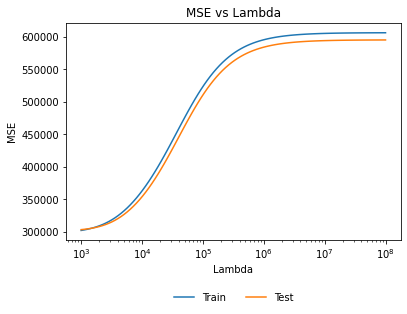

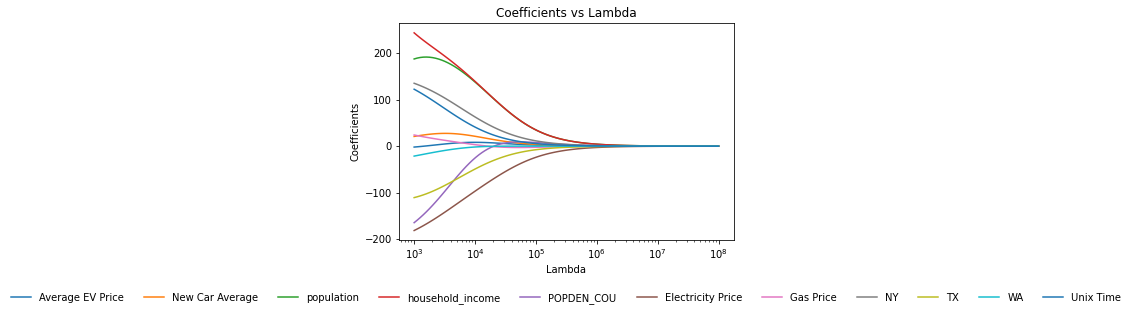

Initial default model time =  3.1708991527557373
CV model time =  12.364996671676636
Optimal model time =  1.310781478881836


['Models/model_rf2.joblib']

In [10]:
df_X = pd.read_csv('.\Data\df_X_county.csv')
df_y = pd.read_csv('.\Data\df_y_county.csv')
# df_X = df_X.drop(columns = 'Unnamed: 0')
# df_y = df_y.drop(columns = 'Unnamed: 0')
#df = pd.read_csv('.\Data\df_original.csv')
X = df_X.to_numpy()
y = df_y.to_numpy()

# only predict PHEV
y = y[:,0]

# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standardize X
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# extract list of feature names
features = df_X.columns.tolist()

# init list to store best models
models2 = []

model_lr2, lmbd, MSE_lr = lr_gridsearch(Ridge, X_train, X_test, y_train, y_test, features)
models2.append(model_lr2)

# Save the trained model to the models folder
joblib.dump(model_lr2, 'Models/model_lr2.joblib')

# random forest wants 1d array
model_rf2 = rf_train(X_train, y_train.flatten())
models2.append(model_rf2)

# Save the trained model to the models folder
joblib.dump(model_rf2, 'Models/model_rf2.joblib')

In [8]:
df_X

,Average EV Price,New Car Average,population,household_income,POPDEN_COU,Electricity Price,Gas Price,NY,TX,WA
0,54669.0,38747.0,509844.0,167290.0,445.323695,12.66,3.378,0.0,0.0,0.0
1,54669.0,38747.0,649980.0,241889.0,821.038725,0.12,2.429,0.0,0.0,0.0
2,54669.0,38747.0,324682.0,127365.0,455.351666,12.66,3.378,0.0,0.0,0.0
3,54669.0,38747.0,69444.0,27199.0,2248.011733,0.12,2.429,0.0,0.0,0.0
4,54669.0,38747.0,715878.0,287756.0,4674.337363,0.12,2.429,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11084,54669.0,38747.0,13588.0,5798.0,9.570523,9.53,3.908,0.0,0.0,1.0
11085,54669.0,38747.0,11906.0,4866.0,7.258144,9.53,3.908,0.0,0.0,1.0
11086,54669.0,38747.0,22121.0,9714.0,25.026666,9.53,3.908,0.0,0.0,1.0
11087,54669.0,38747.0,19702.0,6035.0,10.708173,9.52,3.908,0.0,0.0,1.0


In [39]:
model_rf = joblib.load('Models/model_rf2.joblib')

Elapsed time to compute the importances: 0.062 seconds
Elapsed time to compute the importances: 29.032 seconds


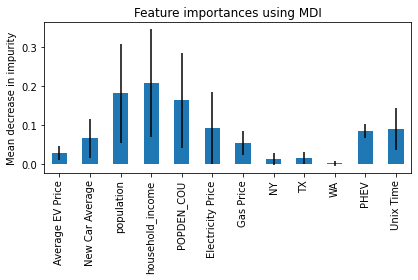

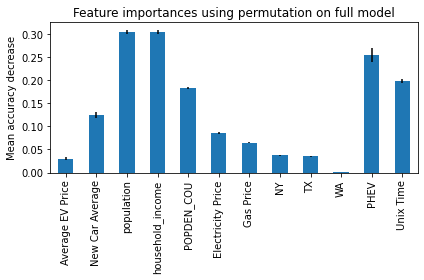

In [41]:
feat_importance(model_rf, X_train, y_train, features)

# OLD BY ZIP

In [ ]:
# df_X = pd.read_csv('.\Data\df_X_OLD.csv')
# df_y = pd.read_csv('.\Data\df_y.csv')
# df = pd.read_csv('.\Data\df_original_OLD.csv')
# X = df_X.to_numpy()
# y = df_y.to_numpy()

# # split train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # standardize X
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# # extract list of feature names
# features = df_X.columns.tolist()

# # init list to store best models
# models = []
# # # Just Cutting it off to the first 2 features 
# # X = X[:,:2]
# # features = features[:2]

# # X.shape
# print(len(df_X))
# print(len(df))
# # ML
# ## Linear Regression
# model_lr, lmbd, MSE_lr = lr_gridsearch(Ridge, X_train, X_test, y_train, y_test, features)
# models.append(model_lr)

# # Save the trained model to the models folder
# joblib.dump(model_lr, 'Models/model_lr.joblib')
# df
# ## Random Forest
# # random forest wants 1d array
# model_rf = rf_train(X_train, y_train.flatten())
# models.append(model_rf)
# # Save the trained model to the models folder
# joblib.dump(model_rf, 'Models/model_rf.joblib')
# #feat_importance(model_rf, X_train, y_train, features)